In [ ]:
# Spotify API 인증
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import requests
import pprint
from spotipy.oauth2 import SpotifyOAuth
#----------------------#
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

session = requests.Session()
session.trust_env = False 

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        redirect_uri=URI,
        scope="user-read-private", 
        open_browser=True
    ))

print("인증 설정 완료")

인증 설정 완료


In [ ]:
artist_name =[]
track_name = []
track_popularity =[]
artist_id =[]
track_id =[]
release_date = []
for i in range(0,1000,50):
    track_results = sp.search(q=f'year:{2025}', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        release_date.append(t['album']['release_date'])

In [ ]:
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'release_date' : release_date, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

In [19]:
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id
0,LE SSERAFIM,SPAGHETTI,2N9miXnewVmUrgl6JSK1FI,2025-10-24,88,4SpbR6yFEvexJuaBpgAU5p
1,ILLIT,NOT CUTE ANYMORE,1k0JAiH11gHL9dc5dfQjQr,2025-11-24,87,36cgvBn0aadzOijnjjwqMN
2,SYSTEM SEOUL,너,3b4YlIUpzYs3CZ6s9GVmzT,2025-05-16,59,1YBOO3E40cq9VVNUHeQGDm
3,ALLDAY PROJECT,FAMOUS,598bDTl82CSTSDnZG0XhGK,2025-06-23,64,4gEMn0YPOdotLOygnk0Ng2
4,ZICO,DUET,0V4J2Ass6cNSt8tCYta2Ww,2025-12-18,17,4XpUIb8uuNlIWVKmgKZXC0
...,...,...,...,...,...,...
1995,Miranda!,Por Amar al Amor (En Vivo Estadio Ferro),15g56hOVAZfuZf9Gu7llk9,2024-12-07,15,2eEmsgWmUFMbtU7agJpnjY
1996,Miranda!,Prisionero (En Vivo Estadio Ferro) (feat. Cris...,5uL9z1sVcr5T9R7zrXnIGW,2024-12-07,16,2eEmsgWmUFMbtU7agJpnjY
1997,Christine D'Clario,Para Mí Es Solo Cristo - Live,0U8Ra8Aru8QqszZLIB8CLa,2024-09-28,16,6JaSyvyg28SHC0Of8YE6M9
1998,Elevation Worship,When Wind Meets Fire (feat. Chris Brown & Tiff...,592no3Q0Levk7PrT39XhBs,2024-07-12,17,3YCKuqpv9nCsIhJ2v8SMix


In [ ]:
import time

artist_popularity = {}
artist_genres = {}
artist_followers = {}

unique_artist_ids = list(set(track_df['artist_id']))

for i in range(0, len(unique_artist_ids), 50):
    batch_ids = unique_artist_ids[i:i+50]

    artists = sp.artists(batch_ids)['artists']

    for artist in artists:
        if artist is None:
            continue

        a_id = artist['id']
        artist_popularity[a_id] = artist['popularity']
        artist_genres[a_id] = artist['genres']
        artist_followers[a_id] = artist['followers']['total']

    time.sleep(0.3)

In [45]:
track_df['artist_popularity'] = track_df['artist_id'].map(artist_popularity)
track_df['artist_genres'] = track_df['artist_id'].map(artist_genres)
track_df['artist_followers'] = track_df['artist_id'].map(artist_followers)

track_df.to_csv("./data/spotify2024-2025.csv", index=False, encoding="utf-8-sig")
track_df.head()

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Ufuk Beydemir,Rüyalarda,5NWLfIeTRlm2K1SJulhAbW,2025-11-06,4,00C6n2psbFm6XWqyPCXJ5v,54,[turkish pop],752656
1,Olivia Dean,Dive - Live From Jimmy Kimmel Live! / 2024,1SecgSDJUZ31ovRC57jGyK,2024-04-23,28,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
2,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
3,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
4,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968


In [46]:
track_df.isna().sum()

artist_name          0
track_name           0
track_id             0
release_date         5
track_popularity     0
artist_id            0
artist_popularity    0
artist_genres        0
artist_followers     0
dtype: int64

In [47]:
track_df['release_date'] = pd.to_datetime(track_df['release_date'], errors='coerce')
track_df = track_df.sort_values(by=['artist_id', 'release_date'])
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Ufuk Beydemir,Rüyalarda,5NWLfIeTRlm2K1SJulhAbW,2025-11-06,4,00C6n2psbFm6XWqyPCXJ5v,54,[turkish pop],752656
1,Olivia Dean,Dive - Live From Jimmy Kimmel Live! / 2024,1SecgSDJUZ31ovRC57jGyK,2024-04-23,28,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
2,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
3,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
4,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968
...,...,...,...,...,...,...,...,...,...
1995,Tom Walker,Lifeline - Live Session,5u2Y9Nd0nbtIqt2BtbOkb6,2024-05-15,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411
1996,en王翊恩,最后一页,1feJ27qymxz673zQ5ZsC8b,2024-11-04,61,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165
1997,en王翊恩,爱错,1B0fMGDb0AT5gajmcyxG3Z,2024-11-19,59,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165
1998,Jazzy,No Bad Vibes,0dgdDB39uUoC8WICmTE2U8,2024-10-18,78,7zAAwgV5Wqmvpb4GzvlRkP,70,[],149051


In [49]:
track_df['prev_track_popularity'] = (
    track_df
    .groupby('artist_id')['track_popularity']
    .shift(1)
)
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
0,Ufuk Beydemir,Rüyalarda,5NWLfIeTRlm2K1SJulhAbW,2025-11-06,4,00C6n2psbFm6XWqyPCXJ5v,54,[turkish pop],752656,NaN
1,Olivia Dean,Dive - Live From Jimmy Kimmel Live! / 2024,1SecgSDJUZ31ovRC57jGyK,2024-04-23,28,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,NaN
2,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,28.0
3,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
4,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
...,...,...,...,...,...,...,...,...,...,...
1995,Tom Walker,Lifeline - Live Session,5u2Y9Nd0nbtIqt2BtbOkb6,2024-05-15,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411,3.0
1996,en王翊恩,最后一页,1feJ27qymxz673zQ5ZsC8b,2024-11-04,61,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165,NaN
1997,en王翊恩,爱错,1B0fMGDb0AT5gajmcyxG3Z,2024-11-19,59,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165,61.0
1998,Jazzy,No Bad Vibes,0dgdDB39uUoC8WICmTE2U8,2024-10-18,78,7zAAwgV5Wqmvpb4GzvlRkP,70,[],149051,NaN


In [34]:
track_df.reset_index(drop=True)

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
0,Ufuk Beydemir,Rüyalarda,5NWLfIeTRlm2K1SJulhAbW,2025-11-06,4,00C6n2psbFm6XWqyPCXJ5v,54,[turkish pop],752656,NaN
1,Olivia Dean,Dive - Live From Jimmy Kimmel Live! / 2024,1SecgSDJUZ31ovRC57jGyK,2024-04-23,28,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,NaN
2,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,28.0
3,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
4,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
...,...,...,...,...,...,...,...,...,...,...
1995,Tom Walker,Lifeline - Live Session,5u2Y9Nd0nbtIqt2BtbOkb6,2024-05-15,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411,3.0
1996,en王翊恩,最后一页,1feJ27qymxz673zQ5ZsC8b,2024-11-04,61,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165,NaN
1997,en王翊恩,爱错,1B0fMGDb0AT5gajmcyxG3Z,2024-11-19,59,7z7tLLiBfmH0kZ2lNVs8LW,63,"[mandopop, gufeng, c-pop, chinese r&b]",193165,61.0
1998,Jazzy,No Bad Vibes,0dgdDB39uUoC8WICmTE2U8,2024-10-18,78,7zAAwgV5Wqmvpb4GzvlRkP,70,[],149051,NaN


In [50]:
popularity_df = track_df.dropna()

In [51]:
popularity_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
2,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,28.0
3,Olivia Dean,Time - Acoustic,7alWklN79r0st7vmjuw5Wb,2024-07-18,12,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
4,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,12.0
5,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,13.0
6,Olivia Dean,Touching Toes - Acoustic,0mNt6f6YeDfDDmytUzCX1n,2024-11-22,13,00x1fYSGhdqScXBRpSj3DW,92,[pop soul],2361968,13.0
...,...,...,...,...,...,...,...,...,...,...
1989,Frédéric Chopin,Minute Waltz (Op. 64 No. 1) - Live On The Ed S...,6UFVtlQH4GCohk2OZyNRO7,2025-11-05,16,7y97mc3bZRFXzT2szRM4L4,75,"[classical piano, classical]",3595526,7.0
1993,Tom Walker,Head Underwater - Live Session,7FC5OU9uuQcr9t1vM75Jq6,2024-05-09,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411,3.0
1994,Tom Walker,Lifeline - Live Session,5u2Y9Nd0nbtIqt2BtbOkb6,2024-05-15,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411,3.0
1995,Tom Walker,Lifeline - Live Session,5u2Y9Nd0nbtIqt2BtbOkb6,2024-05-15,3,7z2avKuuiMAT4XZJFv8Rvh,64,[],1360411,3.0


In [61]:
from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(
    popularity_df['prev_track_popularity'],
    popularity_df['track_popularity']
)

spearman_r, spearman_p = spearmanr(
    popularity_df['prev_track_popularity'],
    popularity_df['track_popularity']
)

print(f"pearson : r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"spearman : r = {spearman_r:.3f}, p = {spearman_p:.3f}")

pearson : r = 0.843, p = 0.000
spearman : r = 0.835, p = 0.000


In [63]:
import statsmodels.api as sm

X = popularity_df[['prev_track_popularity']]
X = sm.add_constant(X)
y = popularity_df['track_popularity']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2291.
Date:                Fri, 26 Dec 2025   Prob (F-statistic):          2.41e-253
Time:                        14:46:19   Log-Likelihood:                -3982.9
No. Observations:                 934   AIC:                             7970.
Df Residuals:                     932   BIC:                             7980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.99

/Users/lucyroh/Desktop/STUDY/spotify/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


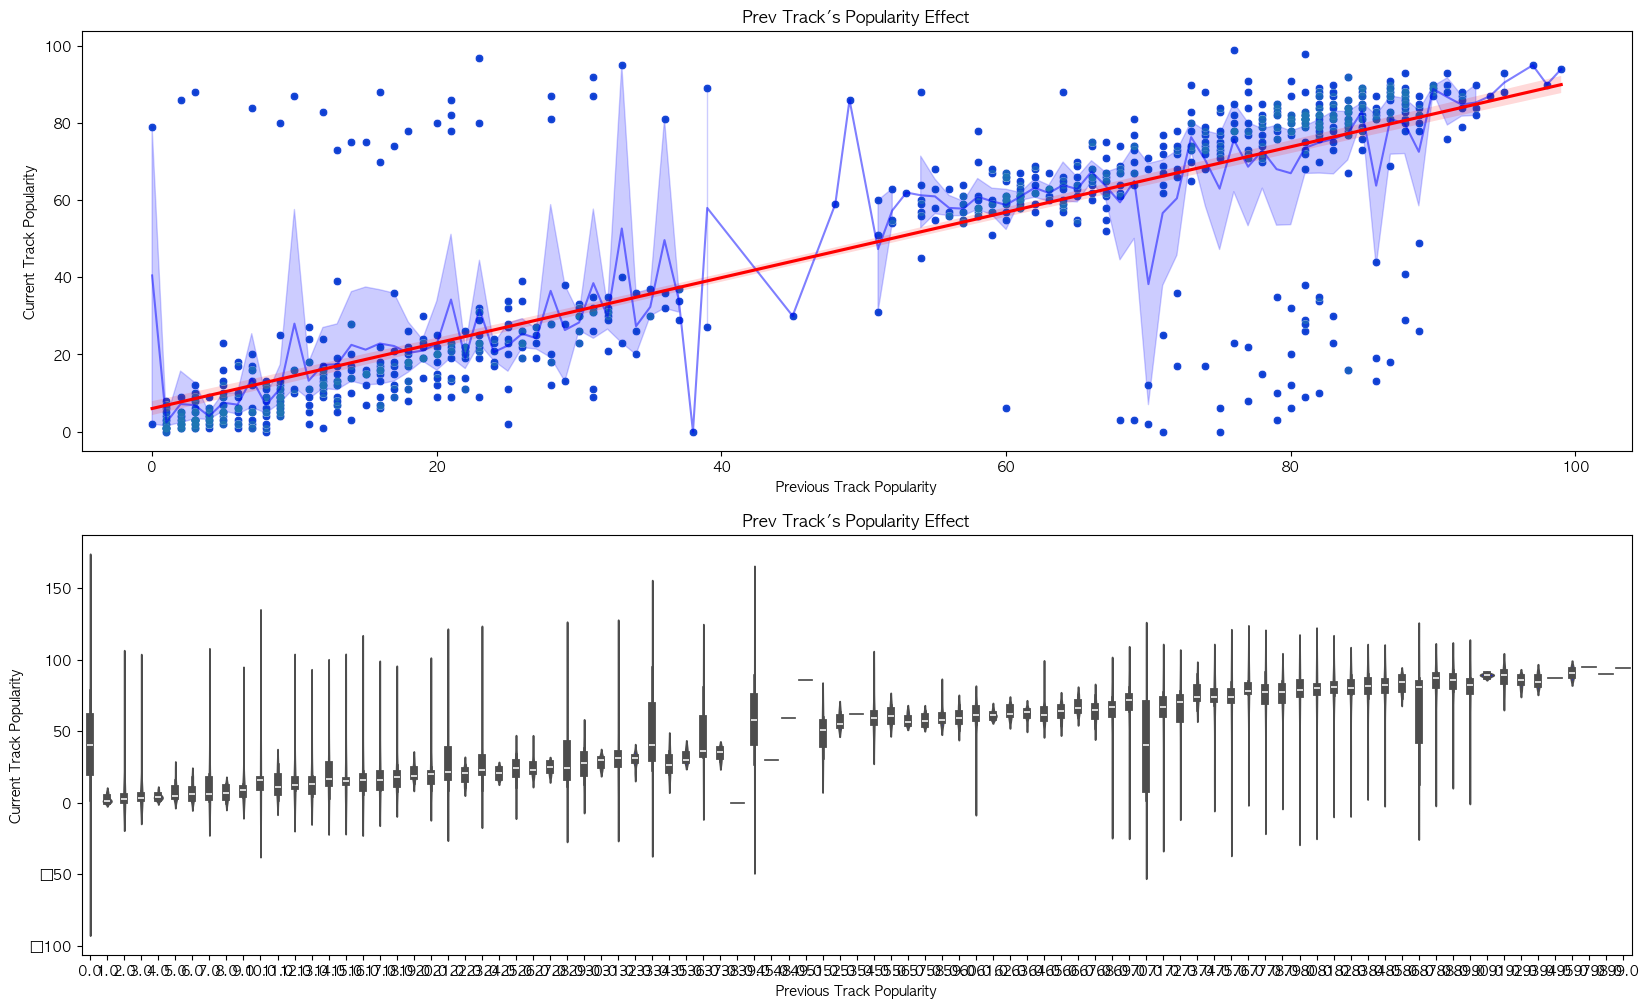

In [85]:
plt.figure(figsize=(20,12))
plt.rc('font', family='AppleGothic')
plt.subplot(2,1,1)
sns.scatterplot(x="prev_track_popularity", y="track_popularity", data=popularity_df, color='blue')
sns.lineplot(x="prev_track_popularity", y="track_popularity", data=popularity_df, color='blue', alpha = 0.5)
sns.regplot(x='prev_track_popularity', y='track_popularity', data=popularity_df, 
            scatter_kws={'alpha':0.5, 's':20}, line_kws={'color':'red'})
plt.xlabel('Previous Track Popularity')
plt.ylabel('Current Track Popularity')
plt.title('Prev Track\'s Popularity Effect')

plt.subplot(2,1,2)
sns.violinplot(x="prev_track_popularity", y="track_popularity", data=popularity_df, color='blue')
plt.xlabel('Previous Track Popularity')
plt.ylabel('Current Track Popularity')
plt.title('Prev Track\'s Popularity Effect')
plt.show()

그래프는 별도의 전처리를 거치지 않은 원본 데이터(Raw Data)의 '이전 곡 인기도(X)'와 '현재 곡 인기도(Y)' 간의 관계를 나타낸다.
붉은색 회귀선은 매우 가파른 기울기와 함께 좁은 신뢰구간을 형성하고 있다.

**통계적 의미**
- 두 변수 간에는 매우 강력한 **양의 상관관계(Pearson r≈0.84)** 가 관찰된다.
- 이는 데이터에 **아티스트의 고유한 인지도(Artist Fixed Effect)**  강하게 반영되어 있음을 시사한다. 즉, 유명 아티스트(High-tier)는 지속적으로 높은 성적을 내고, 신인이나 비주류 아티스트(Low-tier)는 낮은 성적을 유지하는 '빈익빈 부익부(Matthew Effect)' 현상이 데이터에 지배적으로 나타난다.

이 그래프만으로는 "곡 자체의 힘(Momentum)"인지 "아티스트의 이름값"인지 구별할 수 없다. 따라서 순수한 곡 간의 흥행 연계성을 파악하기 위해서는, 아티스트별 평균 인기도를 제거하는 Mean Centering 과정이 필수적이라는 결론이 도출된다.

### 아티스트 효과 제가

In [76]:
popularity_df['popularity_centered'] = (
    popularity_df['track_popularity']
    - popularity_df.groupby('artist_id')['track_popularity'].transform('mean')
)

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_27892/764928336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_df['popularity_centered'] = (


In [77]:
popularity_df['prev_popularity_centered'] = (
    popularity_df['prev_track_popularity']
    - popularity_df
      .groupby('artist_id')['prev_track_popularity']
      .transform('mean')
)

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_27892/3387166168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_df['prev_popularity_centered'] = (


In [79]:
from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(
    popularity_df['prev_popularity_centered'],
    popularity_df['popularity_centered']
)

spearman_r, spearman_p = spearmanr(
    popularity_df['prev_popularity_centered'],
    popularity_df['popularity_centered']
)

print(f"pearson : r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"spearman : r = {spearman_r:.3f}, p = {spearman_p:.3f}")

pearson : r = 0.320, p = 0.000
spearman : r = 0.201, p = 0.000


In [82]:
X = popularity_df[['prev_popularity_centered']]
X = sm.add_constant(X)
y = popularity_df['popularity_centered']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     popularity_centered   R-squared:                       0.103
Model:                             OLS   Adj. R-squared:                  0.102
Method:                  Least Squares   F-statistic:                     106.6
Date:                 Fri, 26 Dec 2025   Prob (F-statistic):           9.59e-24
Time:                         15:20:15   Log-Likelihood:                -3596.9
No. Observations:                  934   AIC:                             7198.
Df Residuals:                      932   BIC:                             7208.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

- 이전 곡이 해당 아티스트 평균보다 1포인트 높을수록, 다음 곡도 평균 대비 약 0.32포인트 높아진다.

/Users/lucyroh/Desktop/STUDY/spotify/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


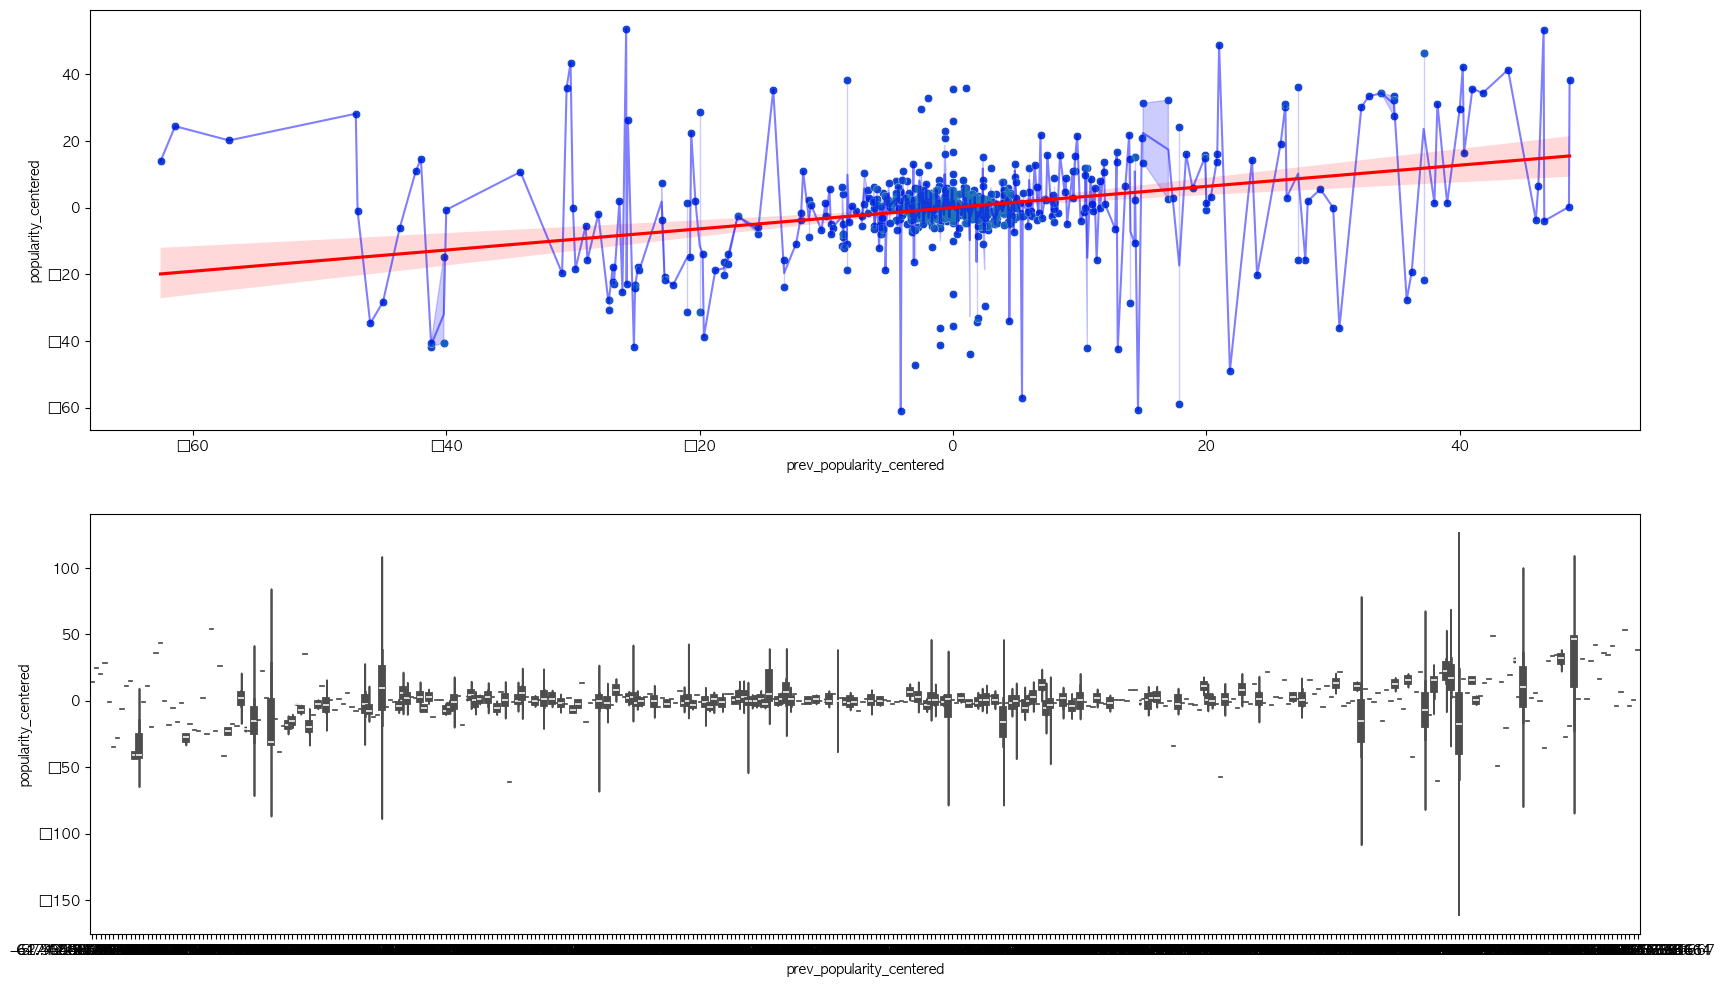

In [83]:
plt.figure(figsize=(20,12))
plt.rc('font', family='AppleGothic')
plt.subplot(2,1,1)
sns.scatterplot(x="prev_popularity_centered", y="popularity_centered", data=popularity_df, color='blue')
sns.lineplot(x="prev_popularity_centered", y="popularity_centered", data=popularity_df, color='blue', alpha = 0.5)
sns.regplot(x='prev_popularity_centered', y='popularity_centered', data=popularity_df, 
            scatter_kws={'alpha':0.5, 's':20}, line_kws={'color':'red'})
plt.subplot(2,1,2)
sns.violinplot(x="prev_popularity_centered", y="popularity_centered", data=popularity_df, color='blue')
plt.show()

**시각화 분석**: 
- 위 산점도(Scatter Plot)와 회귀선(Red Line)은 아티스트별 평균 인기도를 0으로 맞춘 Centered Popularity 데이터를 시각화한 것입니다. X축은 '직전 곡의 상대적 성과', Y축은 '현재 곡의 상대적 성과'를 나타낸다.

**통계적 의미** :
- 데이터가 회귀선을 따라 우상향하는 경향을 보입니다. 이는 **양의 상관관계(r≈0.32)**가 존재함을 시각적으로 확인할 수 있다.
- 즉, 단순히 유명한 아티스트라서 다음 곡이 잘 되는 것이 아니라, "평소보다 더 대박 난 곡"이 나오면 그 다음 곡도 "평소보다 잘 될 확률"이 높아짐을 의미한다.

아티스트의 고정적인 팬덤 영향력(Fixed Effect)을 통제한 상태에서도, 이전 곡의 흥행이 다음 곡에 긍정적인 파급 효과(Spillover Effect)를 주는 **'모멘텀 현상'**이 유효함을 확인할 수 있다.

# 2023-2025 Analysis

### **이전 곡의 인기도가 새로운 곡의 인기도에 유의미한 영향이 있음을 확인했다. 예측 모델을 만들 수 있을까?**
- 아티스트의 이전 곡 성과를 이용해 다음 곡의 상대적 인기도(popularity_centered)를 예측할 수 있는가?
- 타깃: popularity_centered
- 예측 시점: 곡 발매 직후 (미래 정보 X)
- 단위: artist-level time series

In [101]:
years = [2023]

artist_name =[]
track_name = []
track_popularity =[]
artist_id =[]
track_id =[]
release_date = []
for i in range(0,1000,50):
    track_results = sp.search(q=f'year:{2023}', type='track', limit=50, offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        release_date.append(t['album']['release_date'])

In [102]:
df_2023 = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'release_date' : release_date, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(df_2023.shape)
df_2023.to_csv("spotify2023.csv", encoding="utf-8-sig", index=False)
display(df_2023.head())
track_df = pd.concat([track_df, df_2023], ignore_index=True)
track_df.to_csv("spotify2023-2025.csv", encoding="utf-8-sig", index=False)
del df_2023
track_df

(1000, 6)


,artist_name,track_name,track_id,release_date,track_popularity,artist_id
0,TOMIOKA AI,Good bye-bye,6yrSg5ltrGVOoha4TtUBZ3,2023-09-20,55,28uwiPI48qGWTiPz6Zgnwi
1,keshi,UNDERSTAND - Acoustic,1IkbcPeZ14Ed9ZCLwU7bOV,2023-05-16,29,3pc0bOVB5whxmD50W79wwO
2,tuki.,晩餐歌 - Bansanka,2cxcqKwQtfKq7giphxjzOu,2023-09-29,67,1Y5vJqABeI6QI6R95EDV6o
3,Way Ched,FLIRT (Feat. Leellamarz),6oBBMles8dHGlGRT4sZvhJ,2023-11-12,56,75OcDAFGCzj0qehe1mADeM
4,BIBI,Amigos,1fzJtRgnplgXnBnr6DLpTB,2023-11-17,19,6UbmqUEgjLA6jAcXwbM1Z9


,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
0,Giuseppe Verdi,"Cortigiani, vil razza dannata - Live On The Ed...",4xTQrn63kUDmKXBIJupxVb,2024-01-01 00:00:00,3,1JOQXgYdQV2yfrhewqx96o,63.0,"[opera, classical]",723072.0,NaN
1,Noah Kahan,"Your Needs, My Needs - Live from Red Rocks ‘23",51BSR67RxiZySQI61sFXQa,2024-01-04 00:00:00,9,2RQXRUsr4IW1f3mKyKsy4B,84.0,[],4582855.0,NaN
2,Noah Kahan,"Your Needs, My Needs - Live from Red Rocks ‘23",51BSR67RxiZySQI61sFXQa,2024-01-04 00:00:00,9,2RQXRUsr4IW1f3mKyKsy4B,84.0,[],4582855.0,9.0
3,ヨルシカ,晴る,5eY7692tmgHB9dbmq6wa2M,2024-01-05 00:00:00,73,4UK2Lzi6fBfUi9rpDt6cik,73.0,"[j-pop, j-rock, japanese indie, anime]",3358594.0,NaN
4,Andree Right Hand,Dân Chơi Sao Phải Khóc,0dBKcPEAsdxWJsqNDNHcPz,2024-01-05 00:00:00,56,4grjJqg7iwQ8RKHs8d9Snh,56.0,"[vietnamese hip hop, v-pop, vinahouse]",448951.0,NaN
...,...,...,...,...,...,...,...,...,...,...
5995,Isabel LaRosa,i'm yours - Live from Irving Plaza,3NpVUgii1cGAl3pze7CFzb,2023-05-11,13,5arKwJZEvT5uKq4o0JfqR4,NaN,NaN,NaN,NaN
5996,Pedro Capó,5 y 3 - Live Performance,0IdDYDdJdG83RkjlROhDHv,2023-06-23,12,4QVBYiagIaa6ZGSPMbybpy,NaN,NaN,NaN,NaN
5997,AnnenMayKantereit,Lass es kreisen - Live in Köln,2CavjEfW3xt5enUOUJNys8,2023-03-10,13,23xqmJEN3oVxwzqtNIyR5m,NaN,NaN,NaN,NaN
5998,Little Baby Bum,Hush Little Baby,32w2lmKGmMtSOgKVRQBvLj,2023-09-01,12,6b4gOldpp7H0BjFOlTfleW,NaN,NaN,NaN,NaN


In [103]:
track_df['release_date'] = pd.to_datetime(track_df['release_date'], errors='coerce')

In [104]:
artist_popularity = {}
artist_genres = {}
artist_followers = {}

unique_artist_ids = list(set(track_df['artist_id']))

for i in range(0, len(unique_artist_ids), 50):
    batch_ids = unique_artist_ids[i:i+50]

    artists = sp.artists(batch_ids)['artists']

    for artist in artists:
        if artist is None:
            continue

        a_id = artist['id']
        artist_popularity[a_id] = artist['popularity']
        artist_genres[a_id] = artist['genres']
        artist_followers[a_id] = artist['followers']['total']

    time.sleep(0.3)

In [105]:
track_df['artist_popularity'] = track_df['artist_id'].map(artist_popularity)
track_df['artist_genres'] = track_df['artist_id'].map(artist_genres)
track_df['artist_followers'] = track_df['artist_id'].map(artist_followers)

track_df.to_csv("./data/spotify2023-2025.csv", index=False, encoding="utf-8-sig")
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
0,Giuseppe Verdi,"Cortigiani, vil razza dannata - Live On The Ed...",4xTQrn63kUDmKXBIJupxVb,2024-01-01,3,1JOQXgYdQV2yfrhewqx96o,63,"[opera, classical]",723072,NaN
1,Noah Kahan,"Your Needs, My Needs - Live from Red Rocks ‘23",51BSR67RxiZySQI61sFXQa,2024-01-04,9,2RQXRUsr4IW1f3mKyKsy4B,84,[],4582855,NaN
2,Noah Kahan,"Your Needs, My Needs - Live from Red Rocks ‘23",51BSR67RxiZySQI61sFXQa,2024-01-04,9,2RQXRUsr4IW1f3mKyKsy4B,84,[],4582855,9.0
3,ヨルシカ,晴る,5eY7692tmgHB9dbmq6wa2M,2024-01-05,73,4UK2Lzi6fBfUi9rpDt6cik,73,"[j-pop, j-rock, japanese indie, anime]",3358594,NaN
4,Andree Right Hand,Dân Chơi Sao Phải Khóc,0dBKcPEAsdxWJsqNDNHcPz,2024-01-05,56,4grjJqg7iwQ8RKHs8d9Snh,56,"[vietnamese hip hop, v-pop, vinahouse]",448951,NaN
...,...,...,...,...,...,...,...,...,...,...
5995,Isabel LaRosa,i'm yours - Live from Irving Plaza,3NpVUgii1cGAl3pze7CFzb,2023-05-11,13,5arKwJZEvT5uKq4o0JfqR4,73,[],2646491,NaN
5996,Pedro Capó,5 y 3 - Live Performance,0IdDYDdJdG83RkjlROhDHv,2023-06-23,12,4QVBYiagIaa6ZGSPMbybpy,67,"[latin pop, latin]",1753779,NaN
5997,AnnenMayKantereit,Lass es kreisen - Live in Köln,2CavjEfW3xt5enUOUJNys8,2023-03-10,13,23xqmJEN3oVxwzqtNIyR5m,68,"[german indie, german pop, german indie pop]",2206451,NaN
5998,Little Baby Bum,Hush Little Baby,32w2lmKGmMtSOgKVRQBvLj,2023-09-01,12,6b4gOldpp7H0BjFOlTfleW,3,[],12,NaN


In [109]:
track_df.sort_values("release_date", inplace=True)
track_df['release_date'] = pd.to_datetime(track_df['release_date'], errors='coerce')
track_df.reset_index(drop=True)
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
5935,Quevedo,Buenas,0urCgPtrxPYqbTVxzgwlqW,2023-01-01,15,52iwsT98xCoGgiGntTiR7K,84,[],6578632,NaN
5172,Jackson Wang,Slow,0zI9O5dQ614A9mplzriDT0,2023-01-01,22,1kfWoWgCugPkyxQP8lkRlY,63,[k-pop],4298601,NaN
5612,ShowMinorSavage,Thinkin’ bout you - from BMSG TYO SESSION,6jX9r1YTZWE4jicyZ7rwEE,2023-01-01,29,0x7bC0gbku4Mu85Pv6wYva,39,[j-r&b],31832,NaN
5837,Buba Espinho,É Tão Grande O Alentejo,7zaAd2XAGjiU7McAGZaiZ1,2023-01-01,24,3B6lsop4CFEdGzlCksiL6R,52,[fado],42519,NaN
5016,NewJeans,OMG,65FftemJ1DbbZ45DUfHJXE,2023-01-02,79,6HvZYsbFfjnjFrWF950C9d,79,[k-pop],12013240,NaN
...,...,...,...,...,...,...,...,...,...,...
3995,ANDROMEDA,MONTAGEM COMA,1aPVNfAor4sRSzqT1QCi43,NaT,30,1RklNDIiYVZ3dYdEUnB0cS,68,"[phonk, brazilian phonk]",80399,NaN
3996,KNEECAP,Love Making,1mEvR3z3WiOWa0KQZuWYT0,NaT,13,1ZVACPeq7ccGCoUXwtafUU,64,[],476814,NaN
3997,bbno$,bing bong,6vS8BPkw7gHzP9hYvRVRBP,NaT,32,41X1TR6hrK8Q2ZCpp2EqCz,79,[],2925608,NaN
3998,Nouvelle Vague,Shout,7tbfNcsWDvL559Bfls7Cpu,NaT,12,4h7NLIlg1oYdEtfQJfyto0,57,[lounge],423437,NaN


In [111]:
track_df['prev_track_popularity'] = (
    track_df
    .groupby('artist_id')['track_popularity']
    .shift(1)
)
track_df

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity
5935,Quevedo,Buenas,0urCgPtrxPYqbTVxzgwlqW,2023-01-01,15,52iwsT98xCoGgiGntTiR7K,84,[],6578632,NaN
5172,Jackson Wang,Slow,0zI9O5dQ614A9mplzriDT0,2023-01-01,22,1kfWoWgCugPkyxQP8lkRlY,63,[k-pop],4298601,NaN
5612,ShowMinorSavage,Thinkin’ bout you - from BMSG TYO SESSION,6jX9r1YTZWE4jicyZ7rwEE,2023-01-01,29,0x7bC0gbku4Mu85Pv6wYva,39,[j-r&b],31832,NaN
5837,Buba Espinho,É Tão Grande O Alentejo,7zaAd2XAGjiU7McAGZaiZ1,2023-01-01,24,3B6lsop4CFEdGzlCksiL6R,52,[fado],42519,NaN
5016,NewJeans,OMG,65FftemJ1DbbZ45DUfHJXE,2023-01-02,79,6HvZYsbFfjnjFrWF950C9d,79,[k-pop],12013240,NaN
...,...,...,...,...,...,...,...,...,...,...
3995,ANDROMEDA,MONTAGEM COMA,1aPVNfAor4sRSzqT1QCi43,NaT,30,1RklNDIiYVZ3dYdEUnB0cS,68,"[phonk, brazilian phonk]",80399,30.0
3996,KNEECAP,Love Making,1mEvR3z3WiOWa0KQZuWYT0,NaT,13,1ZVACPeq7ccGCoUXwtafUU,64,[],476814,NaN
3997,bbno$,bing bong,6vS8BPkw7gHzP9hYvRVRBP,NaT,32,41X1TR6hrK8Q2ZCpp2EqCz,79,[],2925608,NaN
3998,Nouvelle Vague,Shout,7tbfNcsWDvL559Bfls7Cpu,NaT,12,4h7NLIlg1oYdEtfQJfyto0,57,[lounge],423437,NaN


In [132]:
track_df.isna().sum()

artist_name                    0
track_name                     0
track_id                       0
release_date                   5
track_popularity               0
artist_id                      0
artist_popularity              0
artist_genres                  0
artist_followers               0
prev_track_popularity       1496
popularity_centered            0
prev_popularity_centered    1496
dtype: int64

In [133]:
track_df['popularity_centered'] = (
    track_df['track_popularity']
    - track_df.groupby('artist_id')['track_popularity'].transform('mean')
)
track_df['prev_popularity_centered'] = (
    track_df['prev_track_popularity']
    - track_df
      .groupby('artist_id')['prev_track_popularity']
      .transform('mean')
)
display(track_df.head(5))
display(track_df.tail(5))

,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity,popularity_centered,prev_popularity_centered
5935,Quevedo,Buenas,0urCgPtrxPYqbTVxzgwlqW,2023-01-01,15,52iwsT98xCoGgiGntTiR7K,84,[],6578632,NaN,-32.500000,NaN
5172,Jackson Wang,Slow,0zI9O5dQ614A9mplzriDT0,2023-01-01,22,1kfWoWgCugPkyxQP8lkRlY,63,[k-pop],4298601,NaN,0.000000,NaN
5612,ShowMinorSavage,Thinkin’ bout you - from BMSG TYO SESSION,6jX9r1YTZWE4jicyZ7rwEE,2023-01-01,29,0x7bC0gbku4Mu85Pv6wYva,39,[j-r&b],31832,NaN,-2.400000,NaN
5837,Buba Espinho,É Tão Grande O Alentejo,7zaAd2XAGjiU7McAGZaiZ1,2023-01-01,24,3B6lsop4CFEdGzlCksiL6R,52,[fado],42519,NaN,0.000000,NaN
5016,NewJeans,OMG,65FftemJ1DbbZ45DUfHJXE,2023-01-02,79,6HvZYsbFfjnjFrWF950C9d,79,[k-pop],12013240,NaN,11.428571,NaN


,artist_name,track_name,track_id,release_date,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers,prev_track_popularity,popularity_centered,prev_popularity_centered
3995,ANDROMEDA,MONTAGEM COMA,1aPVNfAor4sRSzqT1QCi43,NaT,30,1RklNDIiYVZ3dYdEUnB0cS,68,"[phonk, brazilian phonk]",80399,30.0,0.0,0.0
3996,KNEECAP,Love Making,1mEvR3z3WiOWa0KQZuWYT0,NaT,13,1ZVACPeq7ccGCoUXwtafUU,64,[],476814,NaN,0.0,NaN
3997,bbno$,bing bong,6vS8BPkw7gHzP9hYvRVRBP,NaT,32,41X1TR6hrK8Q2ZCpp2EqCz,79,[],2925608,NaN,0.0,NaN
3998,Nouvelle Vague,Shout,7tbfNcsWDvL559Bfls7Cpu,NaT,12,4h7NLIlg1oYdEtfQJfyto0,57,[lounge],423437,NaN,0.0,NaN
3999,Dayseeker,My Immortal,5M1wH7BBNhwZFDoaC9J1BL,NaT,17,5FjQVp1Lb0kltmwIuu5kfj,68,"[metalcore, post-hardcore]",526332,NaN,0.0,NaN


In [134]:
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GroupKFold

from datetime import datetime

In [135]:
baseline_df = track_df[
    ['popularity_centered', 'prev_popularity_centered']
].dropna()

In [139]:
y_true = baseline_df['popularity_centered']
y_pred_prev = baseline_df['prev_popularity_centered']

rmse_prev = np.sqrt(
    mean_squared_error(y_true, y_pred_prev)
)
rmse_prev

np.float64(11.69888479065329)

In [140]:
y_pred_zero = np.zeros(len(y_true))

rmse_zero = np.sqrt(
    mean_squared_error(y_true, y_pred_zero)
)

rmse_zero, rmse_prev

(np.float64(11.937183881611698), np.float64(11.69888479065329))

In [142]:
eval_df = track_df[
    ['artist_id', 'popularity_centered', 'prev_popularity_centered']
].dropna()

In [144]:
X = eval_df[['prev_popularity_centered']]
y = eval_df['popularity_centered']
groups = eval_df['artist_id']

In [145]:
gkf = GroupKFold(n_splits=5)

In [146]:
rmse_zero = []
rmse_prev = []
rmse_lm = []
r2_lm = []

In [150]:
for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Baseline 0: 정보 X 예측
    y_pred_zero = np.zeros(len(y_test))
    rmse_zero.append(
        np.sqrt(mean_squared_error(y_test, y_pred_zero))
    )

    # Baseline 1: 이전 곡 기반 + 가수 특성 배제
    y_pred_prev = X_test['prev_popularity_centered']
    rmse_prev.append(
        np.sqrt(mean_squared_error(y_test, y_pred_prev))
    )

    # Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_lm = model.predict(X_test)
    rmse_lm.append(
        np.sqrt(mean_squared_error(y_test, y_pred_lm))
    )
    r2_lm.append(
        r2_score(y_test, y_pred_lm)
    )

In [151]:
print(f"Baseline (0) RMSE: {np.mean(rmse_zero):.3f}")
print(f"Baseline (prev) RMSE: {np.mean(rmse_prev):.3f}")
print(f"Lag Regression RMSE: {np.mean(rmse_lm):.3f}")
print(f"Lag Regression R²: {np.mean(r2_lm):.3f}")

Baseline (0) RMSE: 11.846
Baseline (prev) RMSE: 11.537
Lag Regression RMSE: 10.083
Lag Regression R²: 0.273


- 이전 곡의 성과가 신곡의 성과에 대한 예측 가능성을 높이지만, 그 정확성에는 한계가 존재한다.
- baseline에 비해 이전 곡 정보를 추가한 경우 약 15%의 오차가 감소한다.


## **아티스트 팔로워, 아티스트 인기도 등 다른 feature 추가한다면?**

In [ ]:
track_df['artist_followers_log'] = np.log1p(track_df['artist_followers'])

In [ ]:
track_df['main_genre'] = track_df['artist_genres'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'unknown'
)

In [176]:
#장르의 효과 배제
genre_dummies = pd.get_dummies(track_df['main_genre'], prefix='genre')
track_df = pd.concat([track_df, genre_dummies], axis=1)

In [177]:
feature_cols = [
    'prev_popularity_centered',
    'artist_followers_log',
    'artist_popularity'
] + list(genre_dummies.columns)

In [178]:
eval_df = track_df[
    ['artist_id', 'popularity_centered'] + feature_cols
].dropna()

In [179]:
X = eval_df[feature_cols]
y = eval_df['popularity_centered']
groups = eval_df['artist_id']

In [180]:
gkf = GroupKFold(n_splits=5)

rmse_list = []
r2_list = []

In [181]:
for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse_list.append(
        np.sqrt(mean_squared_error(y_test, y_pred))
    )
    r2_list.append(
        r2_score(y_test, y_pred)
    )

In [182]:
print(f"Extended model RMSE: {np.mean(rmse_list):.3f}")
print(f"Extended model R²: {np.mean(r2_list):.3f}")

Extended model RMSE: 10.120
Extended model R²: 0.267


---